In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(x_train,y_train), (x_test,y_test) = load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

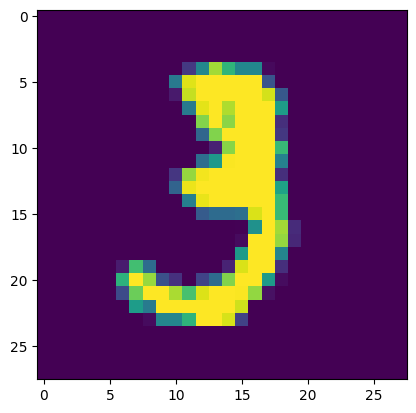

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

In [9]:
from tensorflow.keras import Sequential

In [10]:
from tensorflow.keras.layers import  Flatten, Dense

In [11]:
model = Sequential()

In [12]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(724,activation = "relu"))
model.add(Dense(526,activation = "relu"))
model.add(Dense(128,activation = "relu",input_shape = (724,)))
model.add(Dense(64,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 724)               568340    
                                                                 
 dense_1 (Dense)             (None, 526)               381350    
                                                                 
 dense_2 (Dense)             (None, 128)               67456     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 1026052 (3.91 MB)
Trainable params: 102605

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = "adam",metrics = ["accuracy"])

In [15]:
history = model.fit(x_train,y_train,epochs = 10,validation_data = (x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.6384 - accuracy: 0.9100 - val_loss: 0.2262 - val_accuracy: 0.9335
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1741 - accuracy: 0.9528 - val_loss: 0.1897 - val_accuracy: 0.9477
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1495 - accuracy: 0.9586 - val_loss: 0.1285 - val_accuracy: 0.9655
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1239 - accuracy: 0.9660 - val_loss: 0.1447 - val_accuracy: 0.9636
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1083 - accuracy: 0.9721 - val_loss: 0.1463 - val_accuracy: 0.9621
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0858 - accuracy: 0.9770 - val_loss: 0.1199 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0797 - accuracy: 0.9787 - val_loss: 0.1390 -

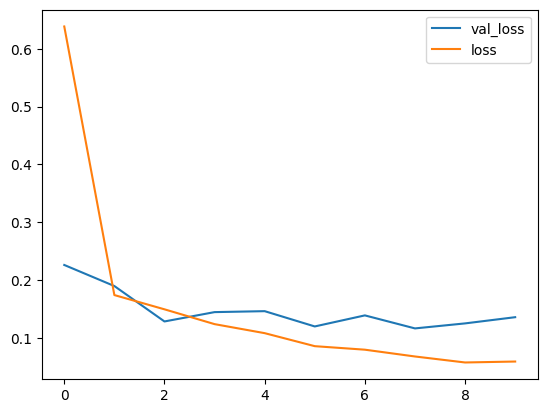

In [16]:
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.plot(history.history['loss'],label = 'loss')
plt.legend()
plt.show()

In [31]:
import numpy
def predict(img):
  plt.imshow(img)
  img = img.reshape(1,28,28)
  pre = model.predict(img)
  print(pre)
  pre_lb = tf.argmax(pre[0]).numpy()
  print(pre_lb)

1/1 [==============================] - 0s 27ms/step
[[2.7932685e-14 4.5787951e-05 3.3297643e-04 3.3304334e-10 9.9642605e-01
  2.7966864e-06 3.4642594e-06 7.2832394e-04 3.4549057e-08 2.4605456e-03]]
4


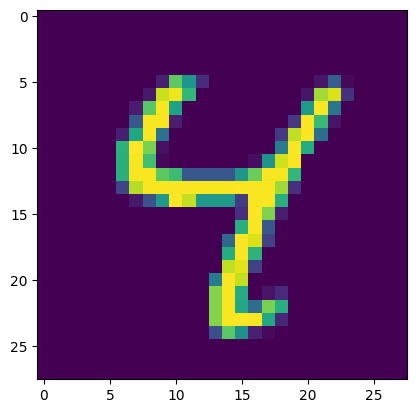

In [37]:
img_index = 6
pre_lb = predict(x_test[img_index])